In [200]:
# from keras.models import Sequential
# from ipywidgets import interact, interactive, fixed
# from keras.layers.core import Flatten, Dense, Dropout
# from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
# from keras.optimizers import SGD
import cv2, numpy as np
from scipy.ndimage.filters import correlate, convolve
from skimage.measure import block_reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [237]:
im = cv2.resize(cv2.imread('image.jpg',0), (224, 224))

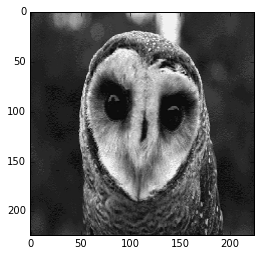

In [238]:
plt.imshow(im, cmap='gray')
plt.show()

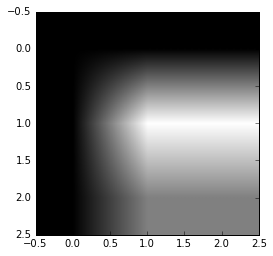

In [203]:
top=[[-1,-1,-1],
     [ -1, 1, 1],
     [ -1, 0, 0]]

plt.imshow(top, cmap='gray')
plt.show()

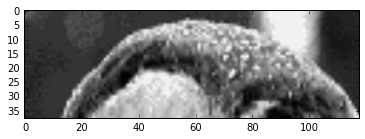

In [222]:
r=(0,224)
def zoomim(x1=0,x2=224,y1=0,y2=224):
    plt.imshow(im[y1:y2,x1:x2], cmap='gray')
w=interactive(zoomim, x1=r,x2=r,y1=r,y2=r)
w

In [223]:
k=w.kwargs
dims = np.index_exp[k['y1']:k['y2']:1,k['x1']:k['x2']]
im[dims]

array([[111, 102,  95, ...,  40,  45,  48],
       [108,  95,  95, ...,  47,  49,  44],
       [ 96,  93,  84, ...,  47,  48,  48],
       ..., 
       [ 39,  47,  50, ..., 185, 221,  34],
       [ 57,  53,  61, ..., 187, 225, 114],
       [ 46,  44,  46, ..., 158, 217, 209]], dtype=uint8)

In [224]:
corrtop = correlate(im, top)

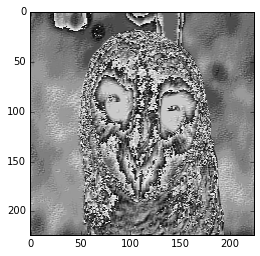

In [225]:
plt.imshow(corrtop,cmap='gray')
plt.show()

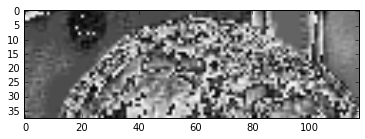

In [226]:
plt.imshow(corrtop[dims],cmap='gray')
plt.show()

[[ 0  0 -1]
 [ 1  1 -1]
 [-1 -1 -1]]


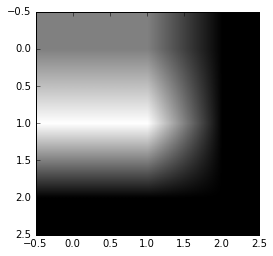

In [209]:
print np.rot90(top,2)
plt.imshow(np.rot90(top,2),cmap='gray')

In [210]:
convtop = convolve(im, np.rot90(top,2))

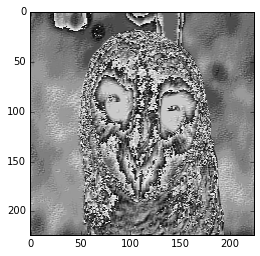

In [211]:
plt.imshow(convtop,cmap='gray')

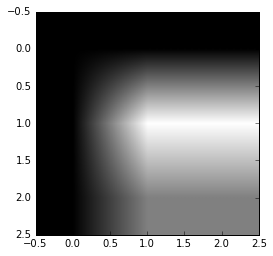

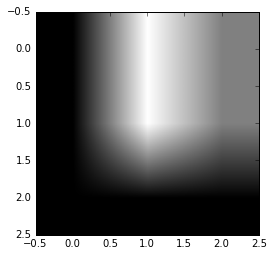

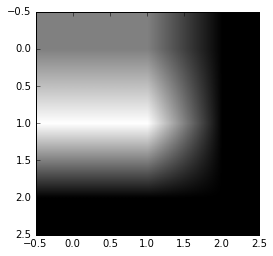

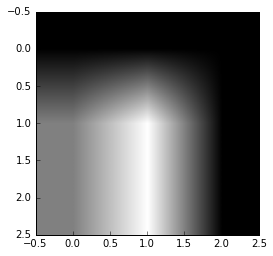

In [257]:
filters=[np.rot90(top,i) for i in range(4)]
for each in filters:
    plt.imshow(each,cmap='gray')
    plt.show()

In [258]:
corrs = [correlate(im, filt) for filt in filters]

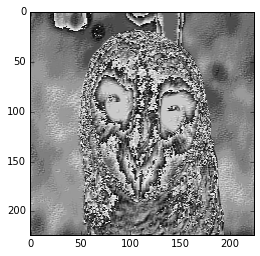

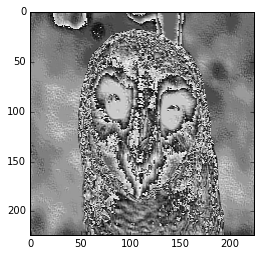

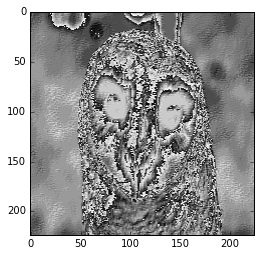

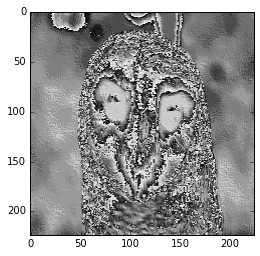

In [259]:
for each3 in corrs:
    plt.imshow(each3,cmap='gray')
    plt.show()

In [260]:
def pool(im): return block_reduce(im, (7,7), np.max)

In [261]:
pool_im=([pool(im) for im in corrs])

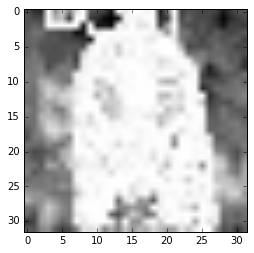

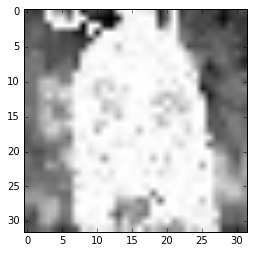

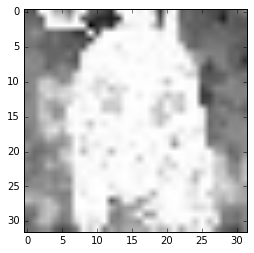

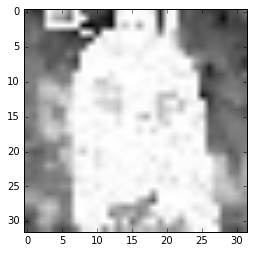

In [262]:
for each in pool_im:
    plt.imshow(each,cmap='gray')
    plt.show()